In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from numpy.linalg import eig
%matplotlib inline

In [2]:
# State Space : x = [x1; x2; x3; ix]---> x1 = x; x2 = x1dot; x3 = integral(xdt); ix = control current


# model constants
Ki = 3.51
Kg = 4.5
R = 3.7
L = 0.096
M = 6

# Controller constants
kd = 1000
kp = 1000
ki = 1000


A = np.array([[0,1, 0, 0],
              [-Kg/M,0,0,Ki/M],
              [1,0,0,0],
              [-kp/L, (Ki-kd)/L ,-ki/L, -R/L]])



In [3]:
def amb_fun(x,t):
    input_force =0.5*np.sin(2*np.pi*t)
    #input_force = 100
    dxdt = np.array([0,0,0,0])
    B = np.array([0, 1, 0, 0])
    U = np.array([input_force/M])
    dxdt = np.dot(A,x) + B*U
    return dxdt

In [4]:
# Initial Conditions
x0 = np.array([0,0,0,0])
# Time span
t_span = np.linspace(0,20,3000)
# Solving the system of ODE
sol = odeint(amb_fun, x0, t_span)

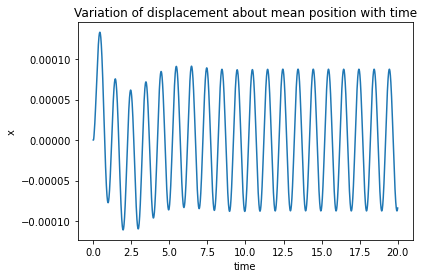

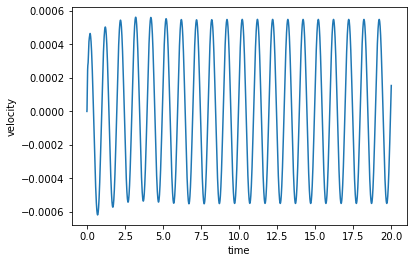

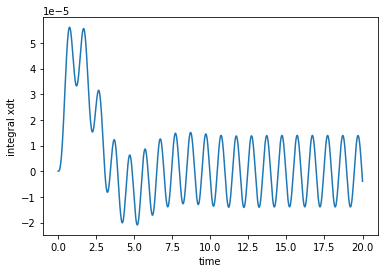

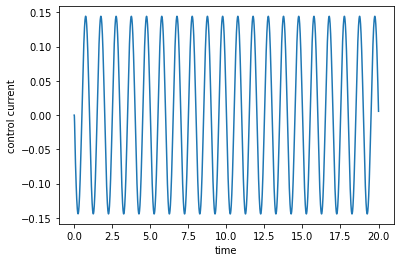

In [5]:
# Plotting the state space variables w.r.t time


plt.xlabel("time")
plt.ylabel("x")
plt.title("Variation of displacement about mean position with time")
plt.plot(t_span,sol[:,0])
plt.show()
plt.xlabel("time")
plt.ylabel("velocity")
plt.plot(t_span,sol[:,1])
plt.show()
plt.xlabel("time")
plt.ylabel("integral xdt")
plt.plot(t_span,sol[:,2])
plt.show()
plt.xlabel("time")
plt.ylabel("control current")
plt.plot(t_span,sol[:,3])
plt.show()

